In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("customer_data.csv")  # replace with your actual path or filename

# Inspect the dataset
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())


Shape: (2000, 8)

Missing Values:
 CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

Duplicates: 0

Data Types:
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

Summary Statistics:
         CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  2000.000000  2000.000000        2000.000000             2000.000000   
mean   1000.500000    48.960000      110731.821500               50.962500   
std     577.494589    28.429747       45739.536688               27.934661   
min       1.000000     0.000000           0.000000                0.000000   
2

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Step 2: Drop non-numeric or irrelevant columns
df = df.select_dtypes(include=['int64', 'float64'])  # Only keep numeric columns

# Step 3: Drop rows with missing values
df = df.dropna()

# Step 4: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 5: Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Optional: Check result
print(scaled_df.head())


   CustomerID       Age  Annual Income ($)  Spending Score (1-100)  \
0   -1.728023 -1.052345          -2.086675               -0.431850   
1   -1.726294 -0.981941          -1.650205                1.069755   
2   -1.724565 -1.017143          -0.537207               -1.611684   
3   -1.722836 -0.911538          -1.126441                0.926745   
4   -1.721107 -0.629924          -1.584734               -0.396098   

   Work Experience  Family Size  
0        -0.787837     0.123358  
1        -0.278342    -0.384815  
2        -0.787837    -1.401161  
3        -1.042584    -0.892988  
4        -0.533089     1.139704  


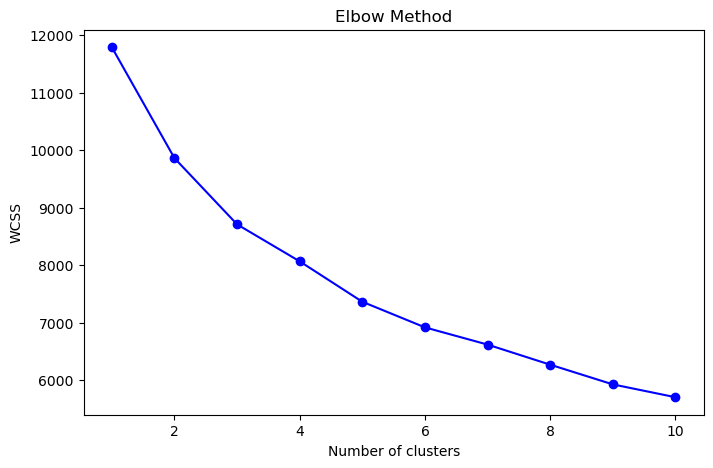

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [6]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, preds)
    print(f"Silhouette Score for k={k}: {score}")



Silhouette Score for k=2: 0.15854966648730903
Silhouette Score for k=3: 0.15298168596049438
Silhouette Score for k=4: 0.14132716985660593
Silhouette Score for k=5: 0.1486333924089746
Silhouette Score for k=6: 0.14694884427472338
Silhouette Score for k=7: 0.1343533601817173
Silhouette Score for k=8: 0.14184413353679376
Silhouette Score for k=9: 0.1480714942633974
Silhouette Score for k=10: 0.14985707279786364


In [7]:
# Assuming the elbow method showed optimal k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)

# Add cluster labels to original data
df['Cluster'] = cluster_labels


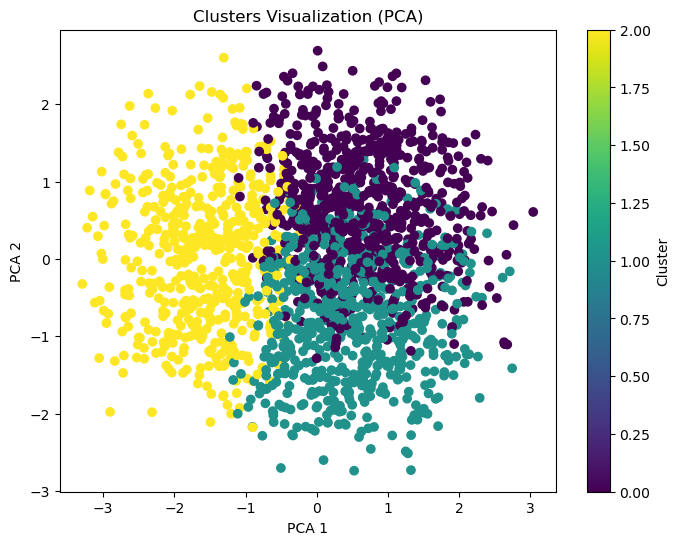

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

# Plotting
plt.figure(figsize=(8,6))
plt.scatter(pca_components[:,0], pca_components[:,1], c=df['Cluster'], cmap='viridis')
plt.title('Clusters Visualization (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


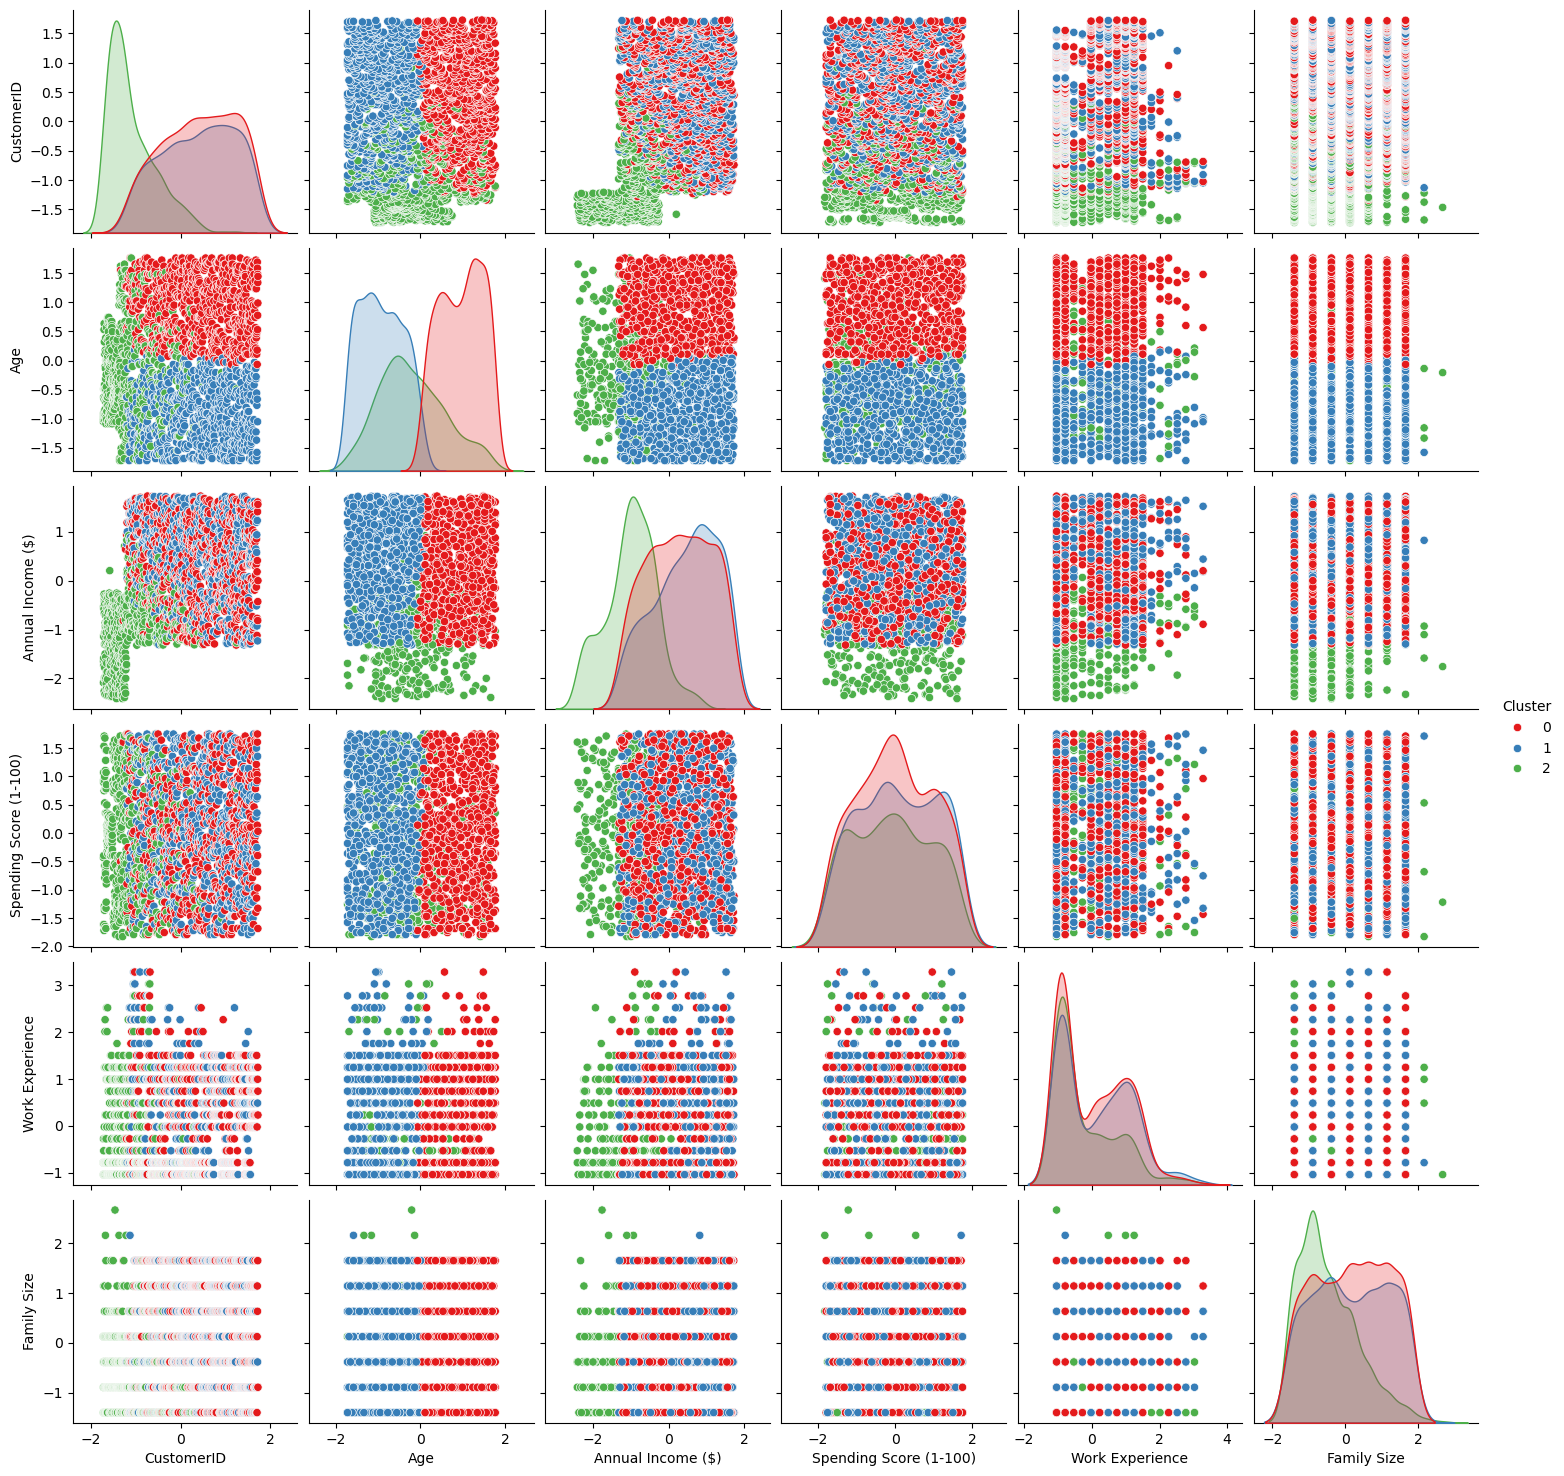

In [9]:
import seaborn as sns

# Add cluster column for plotting
scaled_df['Cluster'] = cluster_labels

# Pair plot
sns.pairplot(scaled_df, hue='Cluster', palette='Set1')
plt.show()


In [10]:
# Visualizing cluster centroids
centroids = kmeans.cluster_centers_

# Convert to DataFrame
centroid_df = pd.DataFrame(centroids, columns=scaled_df.columns[:-1])
print("\nCluster Centroids:\n", centroid_df)



Cluster Centroids:
    CustomerID       Age  Annual Income ($)  Spending Score (1-100)  \
0    0.415199  0.951427           0.280198               -0.001223   
1    0.390587 -0.920026           0.458716                0.070959   
2   -1.098490 -0.193368          -0.991141               -0.089087   

   Work Experience  Family Size  
0         0.042017     0.178783  
1         0.128650     0.166959  
2        -0.225270    -0.471435  


In [11]:
df.to_csv('customer_data_clustered.csv', index=False)